In [80]:
import networkx as nx
import numpy as np
import os
import random
import math 

In [69]:
G=nx.Graph()

In [70]:
os.getcwd()+'/data'

'/content/data'

In [71]:
dir=os.getcwd()+'/data'
videos_to_remove=[]
for filename in os.listdir(dir):
   with open(os.path.join(dir, filename), 'r') as f:
     for line in f.readlines():
      data=line.split("\t")
      related_id=data[9:]
      if len(related_id)>0:
        related_id[-1]=data[-1][:-1]
      
      if(len(data)==1):
        videos_to_remove.append(data[-1][:-1])
        continue
      G.add_node(data[0],uploader=data[1],age=data[2],category=data[3],length=data[4],views=data[5],rate=data[6],ratings=data[7],comments=data[8])
      for i in range(len(related_id)):
        G.add_edge(data[0],related_id[i])


In [72]:
for n in G.nodes():
  if bool(G.nodes[n])==False:
    videos_to_remove.append(n)

In [73]:
a=bool(G.nodes['PF3NlCdIlXU'])
print(~a)

-2


In [74]:
for i in videos_to_remove:
  try:
    G.remove_node(i)
  except:
    print(i)

uug6LpGFZ5E
dL9KUR6h-V4
HPXKwwI2SyY
VVPkJEp0Jnc
CE09L6HSzJ0
S744BBPj23g
6FcmaUa1hsM
QXgxA0_9vaQ
lpER8PLz6d4
roydm9jVPto
zJ_EgE46XAE
Wg_uoNQJ3Jk
Cvf9Xhe37nI
w15Q9N54yKE
yGgcfSseSsQ
iB7-rTIMsjc
_4cGwkV8O44
AyPH3-qAlsQ
ssaq2R45S7s
AR0pCesTzH8
FfVUZJ2JrwE
DGpD330V30w
9Usrr9ZvYE8
9vV6Ph0pdKI
fHLyD2tjuQU
jJROPNgMwbI
qgBVdIlAhqA
1RnmU4Iku8A
tiARqP2ogRs
qi43Qoaxwzw
EGzZtcH0jlk
AXJC8In-S1s
gR8lzAq2OHE
Fnv8Wxq72GA
4cd6STs8vRE
o3oJ2Pa9gs4
LE9j4KiiJAM
ZAkVF7unK4U
XxFbr1ko-BU
LHhLKehpXk0
m5No-OY99wE
SaL9WQOYqO8


In [75]:
G.number_of_edges()

131309

In [76]:
G.number_of_nodes()

48842

STATISTICS OF DATA CODE

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

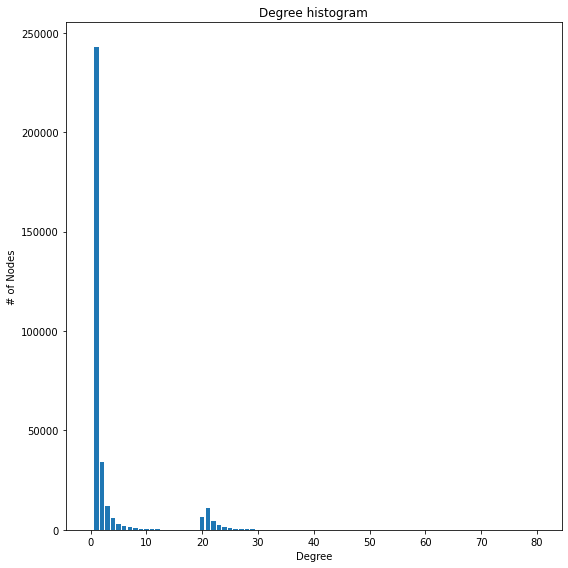

In [ ]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(1,1)
ax2 = fig.add_subplot(axgrid[0:, 0:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [ ]:
import itertools
shortest_paths={}
for selected_nodes in itertools.combinations(G, 2):
  delete_edge=False
  if G.has_edge(selected_nodes[0], selected_nodes[1]):
    G.remove_edge(selected_nodes[0], selected_nodes[1])
    delete_edge=True
  try:
    length=nx.shortest_path_length(G, source=selected_nodes[0], target=selected_nodes[1])
  except Exception as e:
    print(e)
  if length in shortest_paths:
    shortest_paths[length]=shortest_paths[length]+1
  else:
    shortest_paths[length]=1

  if delete_edge:
    G.add_edge(selected_nodes[0], selected_nodes[1])

Streaming output truncated to the last 5000 lines.
No path between ioXyoE-RxJE and dOVNBqNfPjU.
No path between ioXyoE-RxJE and p8Q-Vie8p6A.
No path between ioXyoE-RxJE and a2SeMzn-GdQ.
No path between ioXyoE-RxJE and keyJ9lvQc7Y.
No path between ioXyoE-RxJE and rZtdEtDW1yw.
No path between ioXyoE-RxJE and fi6njMqW50E.
No path between ioXyoE-RxJE and wDLOV52QO1Y.
No path between ioXyoE-RxJE and A5oxcczoTGs.
No path between ioXyoE-RxJE and BY_zyanUj9k.
No path between ioXyoE-RxJE and QL6B0oYZZhI.
No path between ioXyoE-RxJE and OD9pXqljcX8.
No path between ioXyoE-RxJE and P-97Hrej6iA.
No path between ioXyoE-RxJE and x2vzO313nDw.
No path between ioXyoE-RxJE and DDhKsdpagfs.
No path between ioXyoE-RxJE and 55eDVANGYwc.
No path between ioXyoE-RxJE and Cqn7dgTJPv4.
No path between ioXyoE-RxJE and 70QsK8c_rho.
No path between ioXyoE-RxJE and UxJxF_peIp0.
No path between ioXyoE-RxJE and jEm5J51WeyI.
No path between ioXyoE-RxJE and yg2AWq_Cbx0.
No path between ioXyoE-RxJE and nBzpF5e9gEM.
No p

In [ ]:
node_pairs=list(shortest_paths.keys())
shortest_path=list(shortest_paths.values())
plt.bar(node_pairs, tick_label=shortest_path)
plt.show()

In [ ]:
similar_neighbors={}
for n in G.nodes():
  node_genre=G.node[n]['genre']
  count=0
  same=0
  for i in G.neighbors(n):
    count+=1
    if node_genre==G.node[i]['genre'] :
      same+=1
  
  percent=same/count
  if percent in similar_neighbors:
    similar_neighbors[percent]=similar_neighbors[percent]+1
  else:
    similar_neighbors[percent]=1

In [ ]:
nodes=list(similar_neighbors.keys())
percentage=list(similar_neighbors.values())
plt.bar(nodes, tick_label=percentage)
plt.show()

In [ ]:
same_uploader={}
for n in G.nodes():
  uploader=G.node[n]['uploader']
  count=0
  same=0
  for i in G.neighbors(n):
    count+=1
    if uploader==G.node[i]['uploader'] :
      same+=1
  
  percent=same/count
  if percent in same_uploader:
    same_uploader[percent]=same_uploader[percent]+1
  else:
    same_uploader[percent]=1

In [ ]:
nodes=list(same_uploader.keys())
percentage=list(same_uploader.values())
plt.bar(nodes, tick_label=percentage)
plt.show()

In [ ]:
node_views={}
for n in G.nodes():
  views=G.node[n]['views']
  if views in node_views:
    node_views[views]=node_views[views]+1
  else:
    node_views[views]=1

In [ ]:
views=list(node_views.keys())
nodes=list(node_views.values())
plt.bar(nodes, tick_label=views)
plt.show()

PIXIE RANDOM WALK CODE


In [84]:
def personalizedNeighbor(G,F,currentVideo,visited):
  n=G.neighbors(currentVideo)
  probs=np.zeros((len(n)))
  neighbors=[]
  count=0
  for i in G.neighbors(currentVideo):
    p=1
    neighbors.append(i)
    if F['genres']==G.node[i]['genres']:
      p=p*1.5
    
    if F['uploader']==G.node[i]['uploader']:
      p=p*1.5

    p=p*(np.sqrt(np.log(G.node[i]['views']+3)))

    if currentVideo not in visited:
      p=p*1.5

    probs[count]=p
    
  return random.choice(neighbors, 1,p=probs),visited
  

In [85]:
def chooseNeighbor(G):
  nodes=list(G.nodes)
  return random.choice(nodes)

In [90]:
def PixieRandomWalk(q,G,F,N_q,T,V):
  visited=set()
  for i in G.nodes:
    V[i]=0

  for beta in T:
    currentVideo=q
    for i in range(int(N_q/len(T))):
      visited.add(currentVideo)
      V[currentVideo]=V[currentVideo]+1
      teleport=random.uniform(0, 1)
      if teleport < beta :
        currentVideo=chooseNeighbor(q)
      else:
        currentVideo,updated_visited=personalizedNeighbor(G,F,currentVideo,visited)
        visited=updated_visited
  
  return V

In [91]:
def PixieRandomWalkMultiple(Q,Nq,G,F,N,T):
  Vq=[]
  for i in range(len(Q)):
    N_q= Nq[i]
    Vq.append(PixieRandomWalk(Q[i],G,F,N_q,T,{}))
  
  VisitCounts={}
  for v in G.nodes():
    
    total=0
    for i in range(len(Q)):
      total+=Vq[i][v]*Vq[i][v]
      
    VisitCounts[v]=math.sqrt(total)
  
  return VisitCounts
    

In [92]:
#generates the query set Q and N_q for each query
def construct_query(G,N,currentVideo,threshold):

  query=[]
  Nq=[]
  max_degree=0
  Sq=[]

  for i in G.neighbors(currentVideo):

    rand=random.uniform(0, 1)

    if rand < threshold:
      query.append(i)
      max_degree=max(max_degree,G.degree[i])
      
  for i in query:
    sq= G.degree[i] * (max_degree- math.log(G.degree[i]))
    Sq.append(sq)
  
  total_Sq=sum(Sq)
  
  for i in range(len(Sq)):
    Nq.append(N*Sq[i]/total_Sq)
  

  return query,Nq

In [93]:
currentVideo='tgEyuQG3gxM'
N=1000
threshold=0.5
Q,Nq=construct_query(G,N,currentVideo,threshold)
F=G.nodes[currentVideo]
T=[0.5]

VisitCounts=PixieRandomWalkMultiple(Q,Nq,G,F,N,T)

In [94]:
VisitCounts=sorted(VisitCounts,reverse=True)
VisitCounts[:30]

['zzwlRm7SejM',
 'zzwJbtwDUTw',
 'zzusXg0S_JE',
 'zznZokabB1k',
 'zzfntq6TM6U',
 'zzfXE211gSY',
 'zzb77-7N5YM',
 'zz_ncJU8GHQ',
 'zzUQ5WWTSms',
 'zzRWXXy6DdU',
 'zzI3mBewtu4',
 'zzA-G3d4HYk',
 'zz96PSWrvZk',
 'zz7wd4nUAzU',
 'zz5nanze4nk',
 'zz0zJ9edEkw',
 'zyztWhTwKWQ',
 'zyyse2n89HM',
 'zywwKEW74U4',
 'zyihJ5X4pzc',
 'zyiAlDDK0E4',
 'zyYkB_-DjIw',
 'zyDefRgo0ls',
 'zyB059AL7nU',
 'zy9I6FmA6y4',
 'zy78gfGfgRU',
 'zy54-Yekfjc',
 'zy2XzDTX5LI',
 'zy-fB3V7uPQ',
 'zxyRLYRxeJE']

In [82]:
G.nodes['tgEyuQG3gxM']

{'uploader': 'bugleader',
 'age': '1195',
 'category': 'Entertainment',
 'length': '314',
 'views': '48',
 'rate': '0',
 'ratings': '0',
 'comments': '0\n'}